# Problem Statement 
 Predicting Housing Prices for regions in the USA.



# Information about Dataset 

The data contains the following columns:

'**Avg. Area Income**': Avg. Income of residents of the city house is located in.

'**Avg. Area House Ag**e': Avg Age of Houses in same city

'**Avg. Area Number** of Rooms': Avg Number of Rooms for Houses in same city

'**Avg. Area Number** of Bedrooms': Avg Number of Bedrooms for Houses in same city

'**Area Population**': Population of city house is located in

'**Price**': Price that the house sold at

'**Address**': Address for the house

Importing all the needed libraries 

In [60]:
import pandas as pd #  for data processing
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the CSV file 

In [61]:
df = pd.read_csv(r'/content/drive/MyDrive/USA_Housing.csv')

# Checking out the data 

In [62]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [63]:
df.shape 

(5000, 7)

In [64]:
type(df)

pandas.core.frame.DataFrame

In [65]:
df.info() #checking columns and total records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [66]:
df.isnull().sum() # Checking if data has any nulls , NaN values 

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [67]:
df.describe() # Generating descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [68]:
# since we want be needing the Address column so we can drop it 
df.drop(columns=['Address'] , inplace=True)

# Exploratory Data Analysis
Visualize the Entire Data using Pairplot 

And Explore types of relationship across the entire dataset

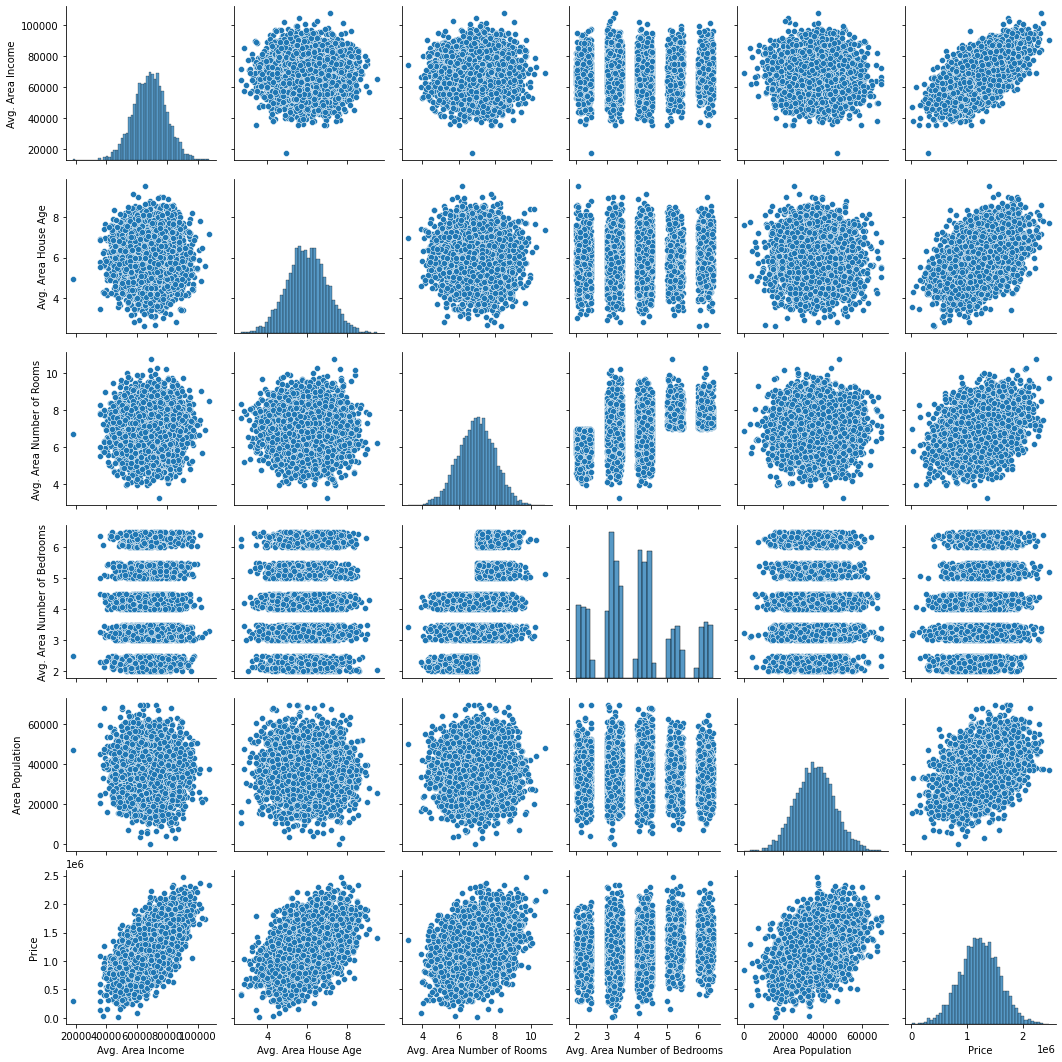

In [69]:
# Let's plot a pair plot of all variables in our dataframe
sns.pairplot(df)

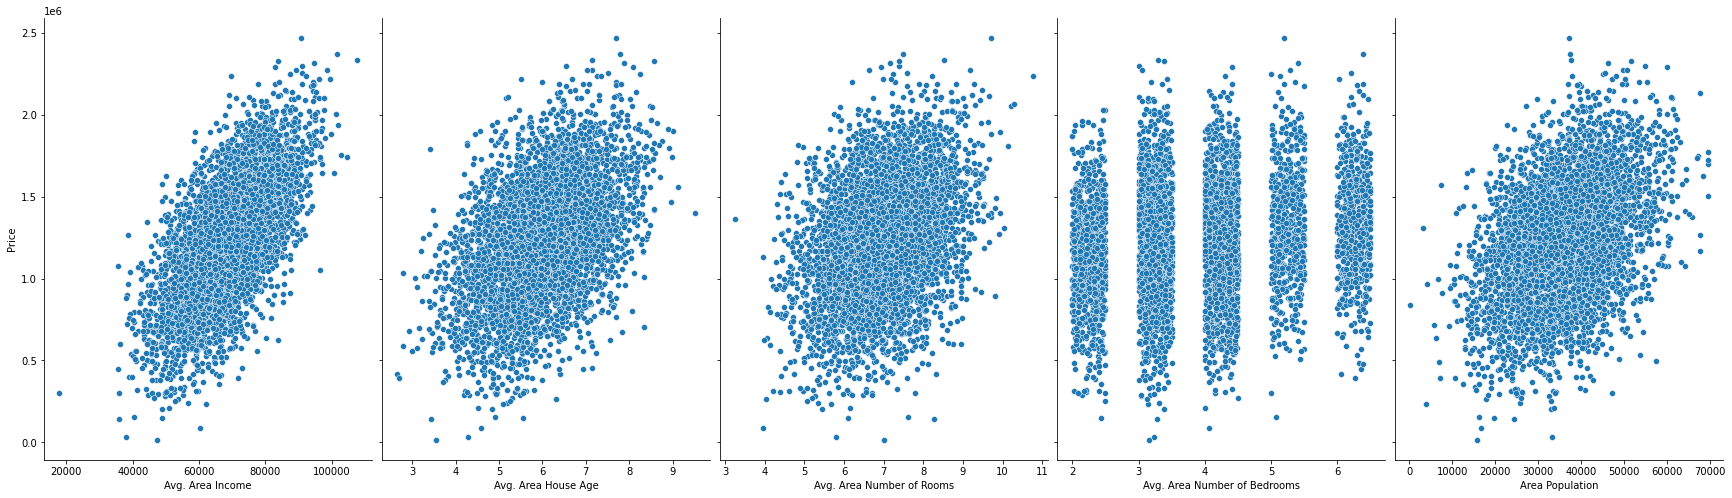

In [70]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms','Area Population'], y_vars='Price',height=7, aspect=0.7, kind='scatter')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


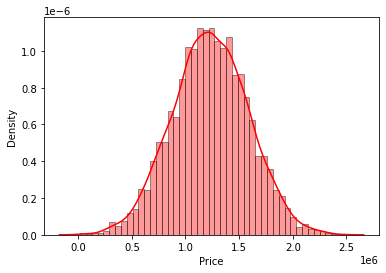

In [71]:
# Distribution of Housing Price Across USA
sns.distplot(df['Price'],hist_kws=dict(edgecolor="black", linewidth=1),color='red')

In [72]:
#Displaying correlation among all the columns 
df.corr()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


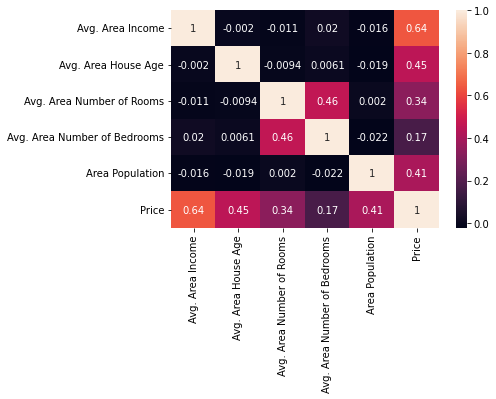

In [73]:
#correlation among all the columns using Heat Map
sns.heatmap(df.corr(), annot = True)

So  we learn from the above plot is that:

All the columns are positively correlated to the "Price" and else all the other columns are negatively correlated.


# Training a Linear Regression Model

X and y arrays 

In [74]:
#Getting all Coulmn names
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [75]:
# Columns as Features
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [76]:
# Price is my Target Variable, which we will try  to predict
y = df['Price']

## Training the Model

In [77]:
#splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=101)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 5)
(1000, 5)
(4000,)
(1000,)


In [79]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # #creating LinearRegression Object

In [80]:
#Training the Data Model
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation
Let's evaluate the model by checking out it's coefficients

In [81]:
#Displaying the Intercept
print(lr.intercept_)

-2640441.3997814013


In [82]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.566696
Avg. Area House Age,165453.042478
Avg. Area Number of Rooms,120499.839093
Avg. Area Number of Bedrooms,1999.785336
Area Population,15.340604


# Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.56.

Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $165453.04.

Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $120499.83.

Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $1999.78.

Holding all other features fixed, a 1 unit increase in Area Population is associated with an increase of $15.34.

# Predictions from our Model
Let's grab predictions off our test set and see how well it did!

In [83]:
predictions = lr.predict(X_test)

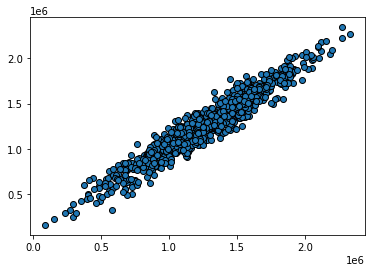

In [84]:
plt.scatter(y_test, predictions, edgecolor='black')

Residual Histogram

Ploting a histogram of the residuals and making sure it looks normally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


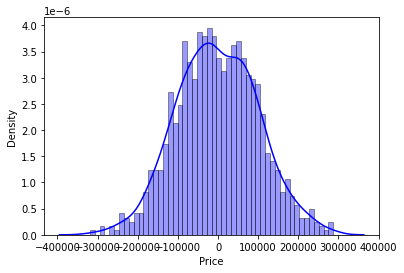

In [85]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [86]:
Rsquare = lr.score(X_train , y_train)
print('Rsquare' , Rsquare)

Rsquare 0.9171466248766579


In [87]:
N =X_train.shape[0]
K = X_train.shape[1]

In [88]:
AdjRsquare = 1 - (1 - Rsquare) * (N-1) / (N-K-1) 
print('Adjusted_Rsquare' , AdjRsquare)

Adjusted_Rsquare 0.9170429025743001


In [89]:
# Calculating the loss-functions 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # MAE is the easiest to understand, 
#because it's the average error.
#-------------
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # MSE is more popular than MAE, because MSE "punishes" larger errors,
# which tends to be useful in the real world.
#-------------
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # RMSE is even more popular than MSE, 
#because RMSE is interpretable in the "y" units.

MAE: 81305.23300085647
MSE: 10100187858.864885
RMSE: 100499.69083964829


From the above result we may infer that, mse is huge which shouldn't be, hence we need to improve our model.

Text(0, 0.5, 'Housing Price')

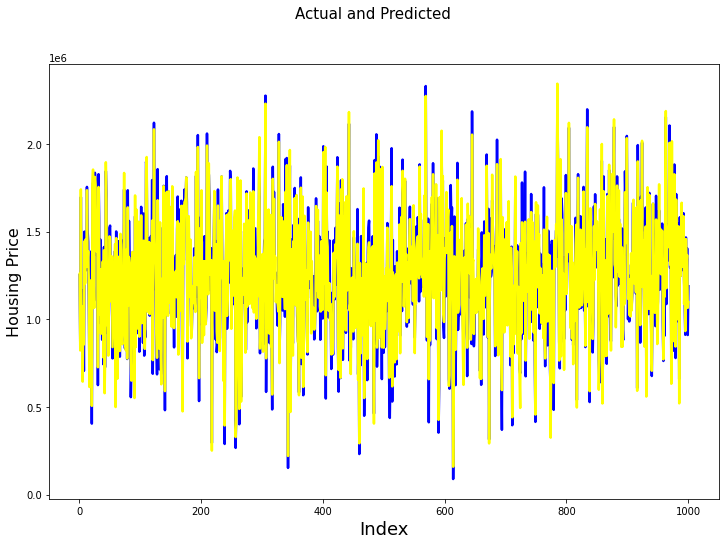

In [90]:
# Actual and Predicted
c = [i for i in range(1,1001,1)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,predictions, color="yellow",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

Also checking through Statistical Method

In [91]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lr_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lr_1.params


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                          -2.640441e+06
Avg. Area Income                2.156670e+01
Avg. Area House Age             1.654530e+05
Avg. Area Number of Rooms       1.204998e+05
Avg. Area Number of Bedrooms    1.999785e+03
Area Population                 1.534060e+01
dtype: float64

In [92]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     8842.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:15:54   Log-Likelihood:                -51777.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

lets drop 'Avg. Area Number of Bedrooms' Column

In [93]:
X.drop(columns=['Avg. Area Number of Bedrooms'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472


In [95]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size = 0.2, random_state=2)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 4)
(1000, 4)
(4000,)
(1000,)


In [97]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LinearRegression

In [99]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

In [100]:
# fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

In [102]:
# print the intercept
print(lr.intercept_)

-2628283.7138187303


In [103]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lr.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.545496
Avg. Area House Age,164845.062182
Avg. Area Number of Rooms,121100.295502
Area Population,15.220764


In [104]:
# Making predictions using the model
y_pred = lr.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9764649141.264551
r_square_value : 0.9187726447439541


In [107]:
from math import sqrt

rms = sqrt(mse)
rms

98816.23925886145

Text(0, 0.5, 'Housing Price')

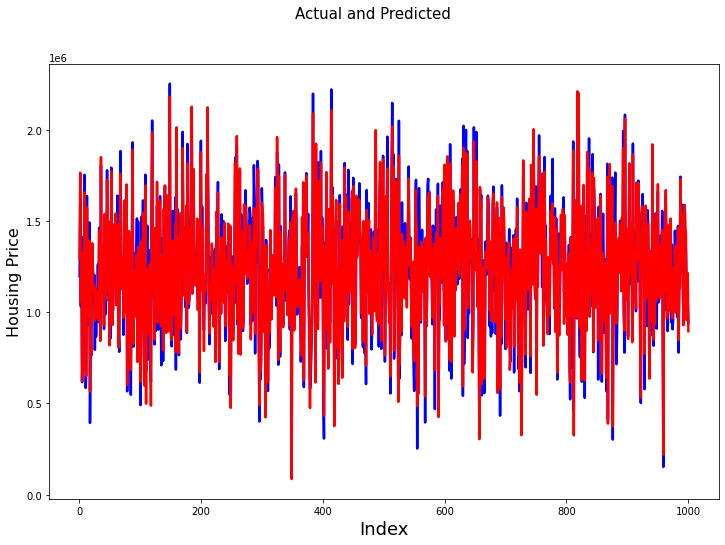

In [109]:
# Actual and Predicted
c = [i for i in range(1,1001,1)] # generating index 
fig = plt.figure(figsize=(12,8))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)                       # Y-label

As we can see our MSE is decreasing  therefore we can saythat our model is improving 